In [1]:
import optuna

C:\Users\skotj\miniconda3\envs\optuna-vis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
path = '../../lstnet_experiments/classifiers/optuna/mnist_clf_optuna'

In [21]:
storage_url = f"sqlite:///{path}/optuna_clf_mnist_clf_study.db"
study_name = "mnist_clf_study"

In [22]:
study = optuna.load_study(
    study_name=study_name,
    storage=storage_url,
)


In [23]:
print("Direction:", study.directions if study._is_multi_objective() else study.direction)
print("Best value:", study.best_value)
print("Best params:", study.best_params)
print("Trials:", len(study.trials))
print("Completed:", len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]))
print("Pruned:", len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]))
print("Fail:", len([t for t in study.trials if t.state == optuna.trial.TrialState.FAIL]))

Direction: 2
Best value: 63.57446808510638
Best params: {'lr': 0.000644656459591536, 'weight_decay': 0.00042689700593191916, 'beta1': 0.85, 'beta2': 0.999, 'augm_rotation': 15, 'augm_zoom': 0.2, 'augm_shift': 3}
Trials: 102
Completed: 100
Pruned: 0
Fail: 2


In [24]:
# df = study.trials_dataframe(attrs=("number","value","state","duration","params","user_attrs","system_attrs"))
# df.sort_values("value").head()

In [25]:
# df.to_csv(f"{path}/optuna_df.csv", index=False)

In [26]:
from optuna.importance import get_param_importances  #, FanovaImportanceEvaluator, MeanDecreaseImpurityImportanceEvaluator

In [27]:
# fANOVA (default)
imps = get_param_importances(study)
print(imps)  # OrderedDict(param -> importance score)

{'augm_zoom': np.float64(0.37713296828969184), 'lr': np.float64(0.2780095237869451), 'beta2': np.float64(0.22661140364419743), 'weight_decay': np.float64(0.07619311072013091), 'beta1': np.float64(0.022527591130382277), 'augm_shift': np.float64(0.01242819099784766), 'augm_rotation': np.float64(0.00709721143080473)}


In [28]:
from optuna.visualization import (
    plot_optimization_history,
    plot_intermediate_values,
    plot_param_importances,
    plot_parallel_coordinate,
    plot_slice,
    plot_contour,
    plot_edf,
)

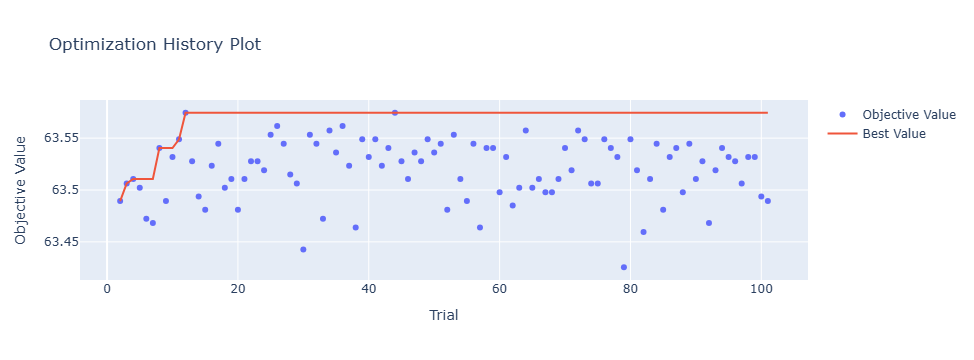

In [29]:
# objective vs.trial number
plot_optimization_history(study)

In [30]:
# learning curves (if you report intermediate values)
#plot_intermediate_values(study)         

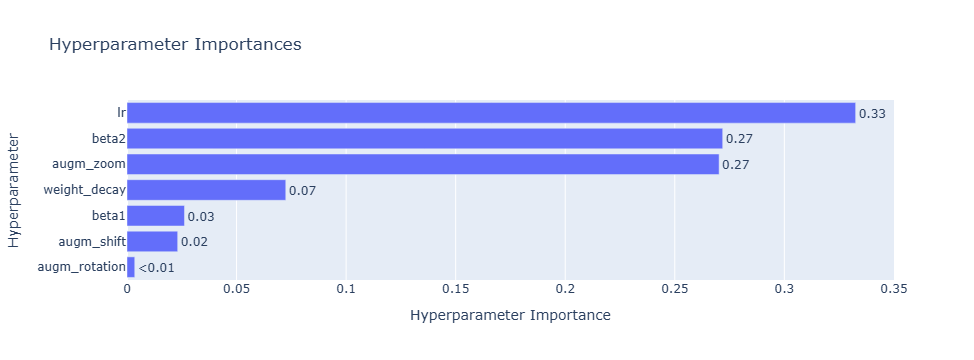

In [31]:
# bar chart of global importances
plot_param_importances(study)

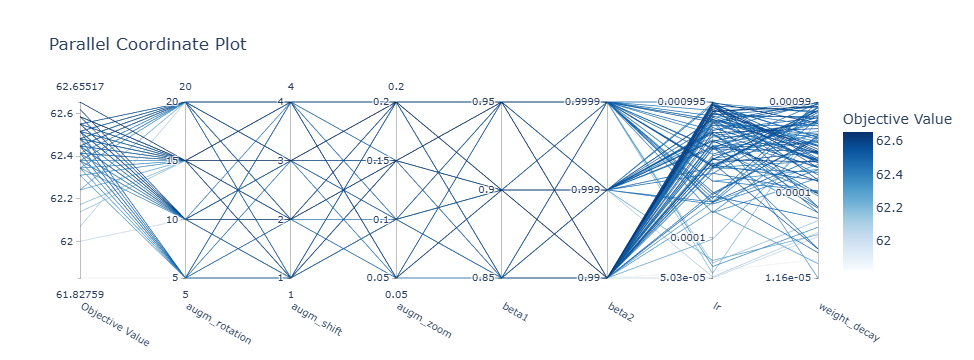

In [16]:
# trade-offs among params -> value
plot_parallel_coordinate(study)  

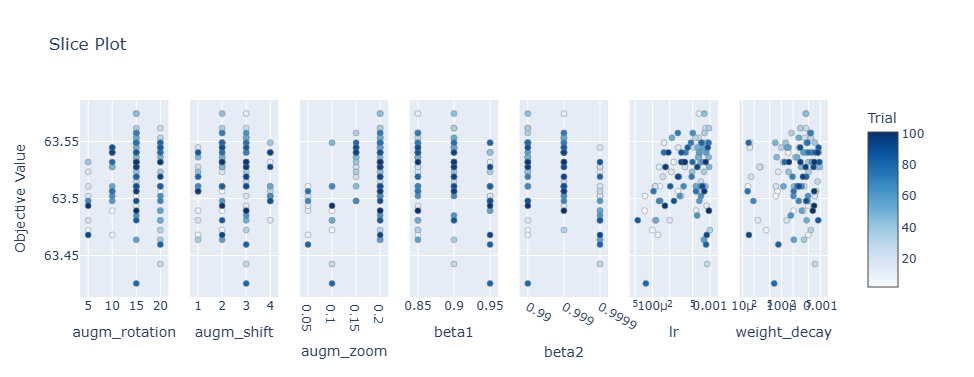

In [32]:
# per-param slices vs. value
plot_slice(study)                       

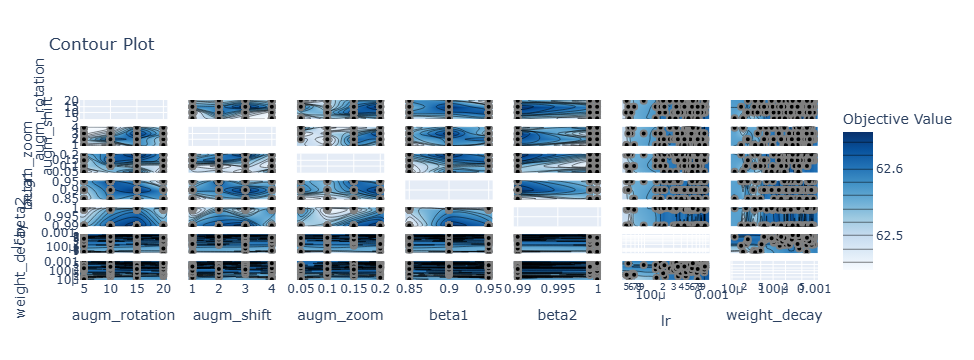

In [18]:
# 2D contours of param interactions
plot_contour(study)                     

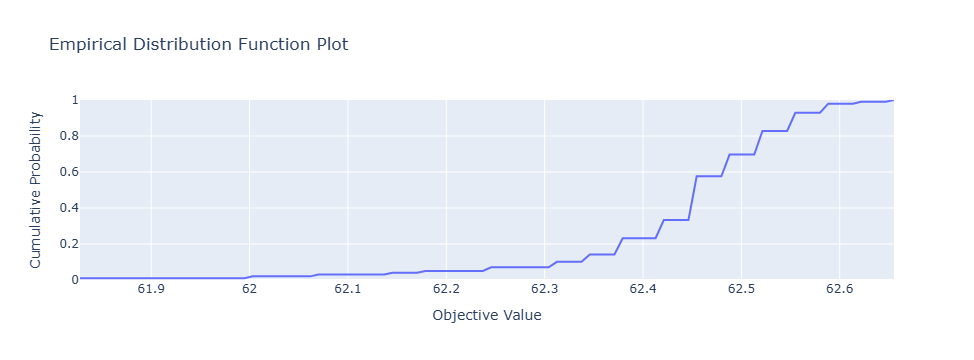

In [19]:
# empirical distribution of best values
plot_edf(study)                         